### Imports:

In [10]:
# %matplotlib widget
%matplotlib inline
import os
import pandas as pd
import vis_detect_helpers_v6 as hp
import photom_helpers as ph
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load and preprocess raw data into dataframe:

In [11]:
# Change the directory to the repository
mouse_dir = os.getcwd() + '/Data' # Automatically sets the directory according to where the repository is cloned
session_settings_files, trials_files = hp.get_session_files(mouse_dir, timestamp='20240726')
session_data = hp.process_session_data(session_settings_files, trials_files)

number of files: session_settings:  1 trials:  1
******************   NEW   SESSION   ******************
mouse_id is:  021
session_date is:  20240726
session_time is:  120032
session timestamp is:  2024-07-26 12:00:32
len iti_values: 921
auto rewd is:  0
punishment is:  end_trial
protocol is:  4
unique outcomes are:  ['FA' 'Hit' 'Miss' 'Ref' 'abort']


### context and color mapping setup:

In [12]:
sns.set_context('notebook')  # other options for context include paper (smaller), talk (bigger), and poster (biggest). Can also add 'scale' argument for axis text size
outcome_palette = {
    'Hit': 'green',
    'FA': 'red',
    'abort': 'black',
    'Miss': 'purple',
    'Ref': 'blue'
}

outcome_order = ['Hit', 'FA', 'Miss', 'abort', 'Ref']

### OUTCOME SEQUENCE

In [13]:
def plot_outcome_sequence(session_data):
    # Extract outcomes from session_data
    outcomes = session_data['outcomes']
    
    
    # Create a DataFrame suitable for seaborn
    outcome_df = pd.DataFrame({
        'Trial': range(len(outcomes)),
        'Outcome': outcomes
    })
    
    # Create the plot
    # plt.figure(figsize=(10, 2))
    sns.scatterplot(data=outcome_df, x='Trial', y='Outcome', hue='Outcome', palette=outcome_palette, marker='|', s=200, alpha=0.7, hue_order=outcome_order)
    
    # Customize the plot
    plt.xlabel('Trial Number')
    plt.ylabel('Outcome')
    plt.title('Sequence of Outcomes')
    plt.yticks([])  # Hide y-axis ticks
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), frameon=False, fontsize='small')
    sns.despine()
    # plt.show()

### FREQUENCY AND FRACTION OF EACH OUTCOME

In [14]:
def plot_outcome_distribution(ax, session_data, outcome_palette):
    # Extract outcomes from session_data
    outcomes = session_data['outcomes']
    
    # Create a DataFrame of outcome counts
    outcome_counts = outcomes.value_counts().reset_index()
    outcome_counts.columns = ['Outcome', 'Frequency']
    
    # Calculate the fraction of each outcome
    outcome_counts['Fraction'] = outcome_counts['Frequency'] / outcome_counts['Frequency'].sum()
    ax.set_title('Frequency and Fraction of Each Outcome')
    # Plot the frequency
    sns.barplot(data=outcome_counts, x='Outcome', y='Frequency', palette=outcome_palette, ax=ax, hue_order=outcome_order)
    
    
    
    # Create a second y-axis for the fraction
    ax2 = ax.twinx()
    
    # Plot the fraction with a secondary y-axis
    sns.barplot(data=outcome_counts, x='Outcome', y='Fraction', ax=ax2, alpha=0)
    
    # Hide the top spines
    ax.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(True)
    # plt.show()

### PERFORMANCE

In [15]:
def plot_session_performance(session_data):
    # Calculate session performance
    perf = ph.calculate_session_performance(session_data)
    
    # Create a DataFrame
    perf_df = pd.DataFrame.from_dict(perf, orient='index', columns=['performance', 'ci95'])
    
    # Create the point plot
    sns.pointplot(x=perf_df.index, y='performance', data=perf_df)
    
    # Add error bars
    plt.errorbar(x=perf_df.index.astype('str'), y=perf_df['performance'], yerr=perf_df['ci95'], capsize=3)
    
    # Customize the plot
    sns.despine()
    plt.xlabel('Change Size (TF)')
    plt.ylabel('Performance')
    plt.title(f'Performance by Change Size)') # mouse: BG_{session_data["mouse_id"].iloc[0]}')
    # plt.tight_layout(pad=2.0)
    # plt.show()

### HIT REACTION TIMES BY CHANGE SIZE

In [16]:
def plot_hit_change_size_reaction_times(session_data):
    # Filter the DataFrame for 'Hit' outcomes
    hit_df = session_data[session_data['outcomes'] == 'Hit']
    
    # Create the point plot
    sns.pointplot(x='change_sizes_TF', y='reaction_times', data=hit_df, errorbar=('ci', 95), capsize=0.15,errwidth=1.5)
    
    
    # Customize the plot
    plt.xlabel('Change Size (TF)')
    plt.ylabel('Reaction Time (s)')
    plt.title('Reaction Times by Change Size')
    sns.despine()
    # plt.show()

### CUMULATIVE FRACTION OF EACH OUTCOME

In [17]:
def plot_cumulative_outcome_curve(session_data, outcome_palette):
      
    # Create the cumulative curve plot using sns.ecdfplot
    # plt.figure(figsize=(8, 4))
    sns.ecdfplot(data=session_data, x=session_data.index, hue='outcomes', palette=outcome_palette, alpha=0.7, hue_order=outcome_order)
    
    # Customize the plot
    plt.title('Outcomes cumulative curves')
    plt.xlabel('Trial Number')
    plt.ylabel('Cumulative Fraction')
    # plt.legend()
    sns.move_legend(plt.gca(), loc = 'upper left',fontsize = 'x-small', frameon=False, title = '')
    sns.despine()
    # plt.tight_layout()
    # plt.show()

### CUMULATIVE FRACTION HITS or MISSES ENCOUNTERED FOR DIFFERENT CHANGE TIMES

In [18]:
def plot_hit_change_encountered_ecdf(session_data, outcome_palette):
    # Filter the DataFrame for 'Hit' and 'Miss' outcomes
    hit_df = session_data[session_data['outcomes'] == 'Hit']
    unique_change_sizes = len(hit_df['change_sizes_TF'].unique())
    palette = sns.color_palette("magma", unique_change_sizes)
    # Create the ECDF plot
    sns.ecdfplot(x='change_times', data=hit_df, hue='change_sizes_TF', palette=palette, alpha=0.7)
    sns.ecdfplot(x='change_times', data=session_data, hue='change_sizes_TF',palette=palette, linestyle='--', alpha=0.7)
    
    # Customize the plot
    plt.xlabel('Change Time (s)')
    sns.despine()
    sns.move_legend(plt.gca(), loc = 'upper right',bbox_to_anchor=(1.2, 1),fontsize = 'x-small', frameon=False, title = '')
    plt.title('Hit change times encountered')

### Show the ecdf for change sizes encountered for hits, compared to the potential changes that could be encountered for different change sizes in the session

In [19]:
def plot_change_encountered_ecdf(session_data, outcome_palette):
    # Filter the DataFrame for 'Hit' and 'Miss' outcomes
    change_encountered_df = session_data[(session_data['outcomes'] == 'Hit') | (session_data['outcomes'] == 'Miss')]
    
    # Create the ECDF plot
    sns.ecdfplot(x='change_times', data=change_encountered_df, hue='outcomes', palette=outcome_palette, alpha=0.7, hue_order=outcome_order)
    sns.ecdfplot(x='change_times', data=session_data, color='black', linestyle='--', alpha=0.5)
    
    # Customize the plot
    plt.xlabel('Change Time (s)')
    sns.despine()
    sns.move_legend(plt.gca(), loc = 'upper right',bbox_to_anchor=(1.2, 1),fontsize = 'x-small', frameon=False, title = '')
    plt.title('Change times encountered')
    # plt.legend(labels=['Hit', 'Miss'], loc='upper right', bbox_to_anchor=(1.2, 1), frameon=False, fontsize='x-small')
    # plt.show()

### HIT REACTION TIMES BY CHANGE SIZE AS A FUNCTION OF TRIAL PROGRESSION

In [20]:
def plot_session_progession_hit_reaction_time(session_data, bin_size=50):
    # Filter the DataFrame for 'Hit' outcomes
    hit_df = session_data[session_data['outcomes'] == 'Hit'].copy()
    
    # Use the DataFrame index as 'trial_progression'
    hit_df['trial_progression'] = hit_df.index
    
    # Create bins for trial_progression
    hit_df['trial_bin'] = hit_df['trial_progression'] // bin_size
    
    # Calculate the midpoint of each bin
    hit_df['bin_midpoint'] = hit_df['trial_bin'] * bin_size + bin_size / 2
    
    # Group by bin_midpoint and change_sizes_TF and compute mean and standard error
    bin_stats = hit_df.groupby(['bin_midpoint', 'change_sizes_TF'])['reaction_times'].agg(['mean', 'sem']).reset_index()
    
    # Create a custom color palette using magma colormap
    unique_change_sizes = len(hit_df['change_sizes_TF'].unique())
    palette = sns.color_palette("magma", unique_change_sizes)
    
    # Plot using sns.lineplot
    # plt.figure(figsize=(8, 4))
    sns.lineplot(data=bin_stats, x='bin_midpoint', y='mean', hue='change_sizes_TF', palette=palette, marker='o',errorbar=('ci',95), err_style='bars')
    
    # Customize the plot
    plt.title('Hit Reaction Time vs. Trial Progression')
    plt.xlabel('Session progression (Trial Number)')
    plt.ylabel('Mean Reaction Time')
    plt.legend(title='Change Sizes', loc='upper right', bbox_to_anchor=(1.5, 1), frameon=False, fontsize='x-small')
    sns.despine()
    # plt.tight_layout()
    # plt.show()

### FA REACTION TIMES BY CHANGE SIZE AS A FUNCTION OF TRIAL PROGRESSION

In [21]:
def plot_session_progession_fa_reaction_time(session_data, bin_size=50):
    # Filter the DataFrame for 'FA' outcomes
    fa_df = session_data[session_data['outcomes'] == 'FA'].copy()
    fa_df = fa_df[fa_df['reaction_times'] > 3]
    # Use the DataFrame index as 'trial_progression'
    fa_df['trial_progression'] = fa_df.index
    
    # Create bins for trial_progression
    fa_df['trial_bin'] = fa_df['trial_progression'] // bin_size
    
    # Calculate the midpoint of each bin
    fa_df['bin_midpoint'] = fa_df['trial_bin'] * bin_size + bin_size / 2
    
    # Group by bin_midpoint and change_sizes_TF and compute mean and standard error
    bin_stats = fa_df.groupby(['bin_midpoint', 'change_sizes_TF'])['reaction_times'].agg(['mean', 'sem']).reset_index()
    
    # Create a custom color palette using magma colormap
    unique_change_sizes = len(fa_df['change_sizes_TF'].unique())
    palette = sns.color_palette("magma", unique_change_sizes)
    
    # Plot using sns.lineplot
    # plt.figure(figsize=(8, 4))
    sns.lineplot(data=bin_stats, x='bin_midpoint', y='mean',marker='o', err_style='bars')
    
    # Customize the plot
    plt.title('FA Reaction Time as a Function of Trial Progression')
    plt.xlabel('session progression (Trial Number)')
    plt.ylabel('Mean Reaction Time')
    sns.despine()
    # plt.tight_layout()
    # plt.show()

### HIT TIME DISTRIBUTION FOR DIFFERENT CHANGE SIZES

In [22]:
def plot_hit_time_distributions(session_data):
    hit_df = session_data[session_data['outcomes'] == 'Hit']
    # Create a custom color palette using magma colormap
    unique_change_sizes = len(hit_df['change_sizes_TF'].unique())
    palette = sns.color_palette("magma", unique_change_sizes)
    sns.kdeplot(data=hit_df, x='reaction_times', hue = 'change_sizes_TF', palette=palette,  fill = True, alpha = 0.2, bw_adjust = 1.0)#, height = 5, aspect = 1.5)
    plt.xlim(0,2.15)
    plt.xlabel('Reaction Time (s)')
    plt.title('Hit Reaction Time Distribution')
    sns.move_legend(plt.gca(), loc = 'upper right',bbox_to_anchor=(1, 1),fontsize = 'x-small', frameon=False, title = 'Change Sizes')
    sns.despine()
    # plt.show()

### ORGANIZE PLOTS IN A GRID (and save figure in cwd folder)

/var/folders/7z/cnv3pjd15pb13w7_36x1fv5w0000gn/T/ipykernel_18745/1302256587.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=outcome_counts, x='Outcome', y='Frequency', palette=outcome_palette, ax=ax, hue_order=outcome_order)
/var/folders/7z/cnv3pjd15pb13w7_36x1fv5w0000gn/T/ipykernel_18745/637242957.py:6: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(x='change_sizes_TF', y='reaction_times', data=hit_df, errorbar=('ci', 95), capsize=0.15,errwidth=1.5)


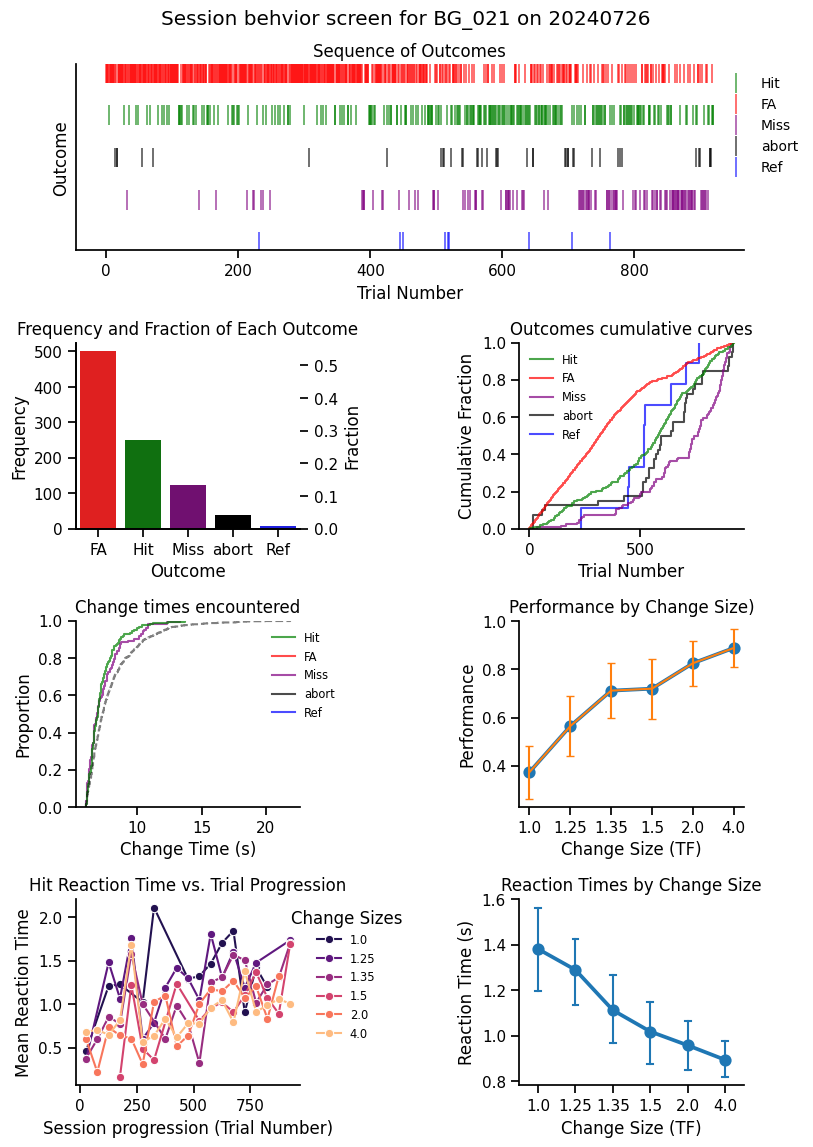

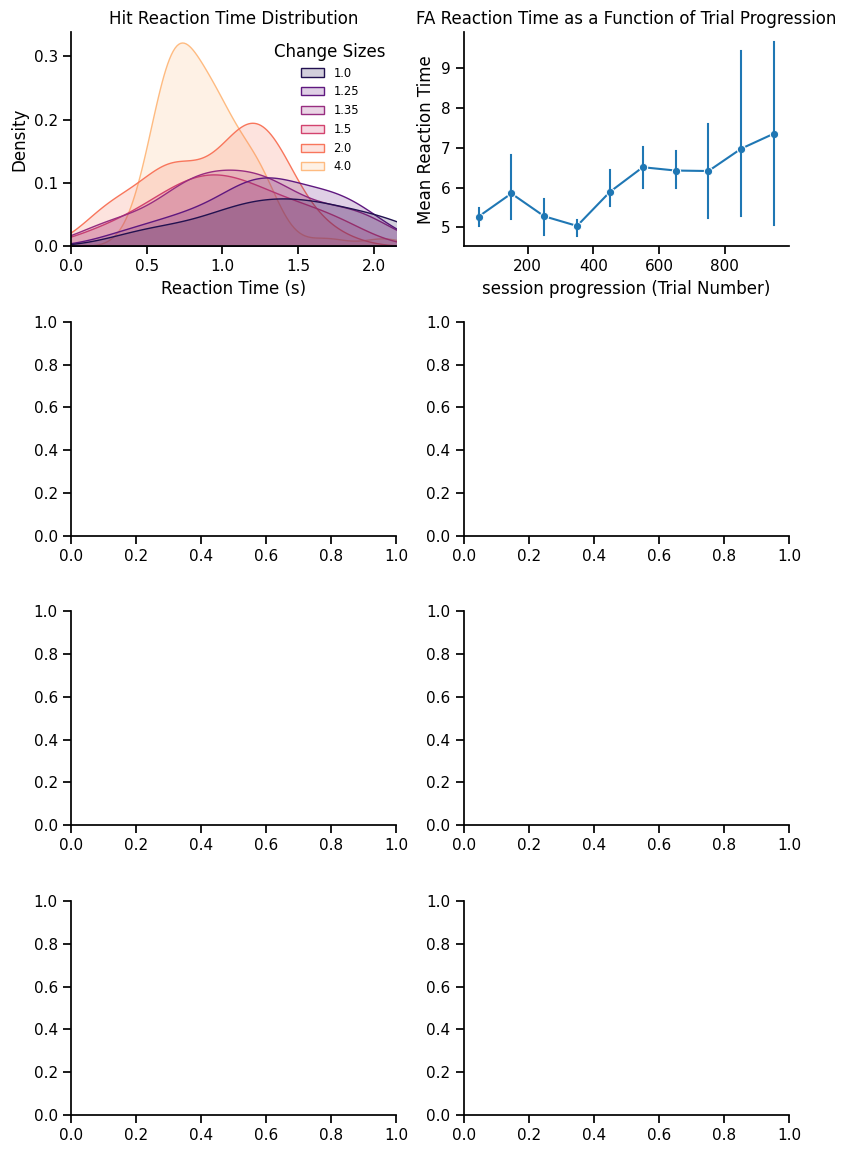

In [23]:
def plot_session_behavior_screen(session_data, outcome_palette):    
    mouse_id = 'BG_' + session_data['mouse_id'][0]
    session_timestamp = session_data['session_date'][0]
    from matplotlib.gridspec import GridSpec
    from matplotlib.backends.backend_pdf import PdfPages
    ### PAGE 1 OF FIGURE (AND EXPORTED .pdf)
    # Create a larger figure with multiple subplots
    fig = plt.figure(figsize=(8.27, 11.69))  # A4 size in inches (8.27 x 11.69)
    gs = GridSpec(4, 2, figure=fig)



    ax1 = fig.add_subplot(gs[0,:])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])
    ax4 = fig.add_subplot(gs[2,0])
    ax5  =fig.add_subplot(gs[2,1])
    ax6 = fig.add_subplot(gs[3,0])
    ax7 = fig.add_subplot(gs[3,1])

    # plot into the grid of page 1:
    plt.sca(ax1)
    plot_outcome_sequence(session_data)
    plt.sca(ax2)
    plot_outcome_distribution(ax2,session_data, outcome_palette)
    plt.sca(ax3)
    plot_cumulative_outcome_curve(session_data, outcome_palette)
    plt.sca(ax4)
    plot_change_encountered_ecdf(session_data, outcome_palette)
    plt.sca(ax5)
    plot_session_performance(session_data)
    plt.sca(ax6)
    plot_session_progession_hit_reaction_time(session_data)
    plt.sca(ax7)
    plot_hit_change_size_reaction_times(session_data)

    fig2 = plt.figure(figsize=(8.27, 11.69))  # A4 size in inches (8.27 x 11.69)
    gs_2 = GridSpec(4, 2, figure=fig2)

    ax8 = fig2.add_subplot(gs_2[0,0])
    ax9 = fig2.add_subplot(gs_2[0,1])
    ax10 = fig2.add_subplot(gs_2[1,0])
    ax11 = fig2.add_subplot(gs_2[1,1])
    ax12 = fig2.add_subplot(gs_2[2,0])
    ax13 = fig2.add_subplot(gs_2[2,1])
    ax14 = fig2.add_subplot(gs_2[3,0])
    ax15 = fig2.add_subplot(gs_2[3,1])

    # plot into the grid of page 2:
    plt.sca(ax8)
    plot_hit_time_distributions(session_data)
    plt.sca(ax9)
    plot_session_progession_fa_reaction_time(session_data, bin_size=100)

    fig.suptitle(f'Session behvior screen for {mouse_id} on {session_timestamp}')
    # Adjust layout to fit everything nicely
    fig.tight_layout() #(pad = 2.0)
    # fig.subplots_adjust(hspace=0.3)
    fig2.tight_layout() #(pad = 2.0)

    # Save or display the figure
    with PdfPages(f'session_behvior_screen_mouse_{mouse_id}_{session_timestamp}.pdf') as pdf:
        pdf.savefig(fig)
        pdf.savefig(fig2)

    plt.show()  # Display the figure
    
# Example usage:
plot_session_behavior_screen(session_data, outcome_palette)